In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

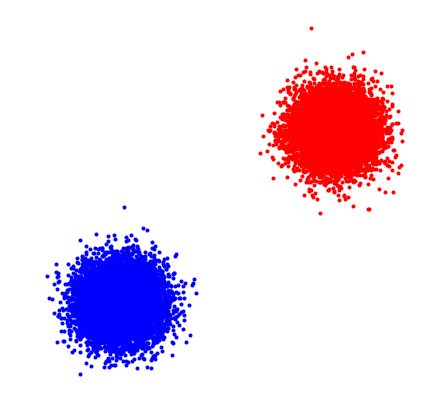

In [4]:
plt.figure(figsize=(7,7))
plt.axis("off");
N = 10000
d0 = 1.6*np.random.randn(N,2)
d0[:,0]= d0[:,0] - 3
plt.plot(d0[:,0],d0[:,1],'.b')
d1 = 1.6*np.random.randn(N,2)+13.6
plt.plot(d1[:,0],d1[:,1],'.r')
Data1 = np.concatenate((d0,d1))

In [8]:
#compute distances:
def distance(a,b):
    return (a[0]-b[0])*(a[0]-b[0])+(a[1]-b[1])*(a[1]-b[1])
#use distance matrix to compute the closest for each node
def compute_closest(data,matrix,i,n):
    #sorted matrix
    closest=np.zeros(n)
    a= np.sort(matrix[i])[1:]
    for k in range(len(data)):
        for j in range(n):
            if (a[j]==matrix[i][k]):closest[j]=k
    return closest

In [10]:
#compute matrix of distances for d0:
dist_matrixd0=[]
for i in range(len(d0)):
    dist1=[]
    dist_matrixd0.append(dist1)
    for j in range(len(d0)):
        dist1.append(distance(d0[i],d0[j]))
print("distance matrix computed")
closest0=[]
for i in range(len(d0)):
    closest0.append(compute_closest(d0,dist_matrixd0,i,4))

distance matrix computed


In [11]:
#compute matrix of distances for d1:
dist_matrixd1=[]
for i in range(len(d1)):
    dist1=[]
    dist_matrixd1.append(dist1)
    for j in range(len(d1)):
        dist1.append(distance(d1[i],d1[j]))
print("distance matrix computed")
closest1=[]
for i in range(len(d1)):
    closest1.append(compute_closest(d1,dist_matrixd1,i,4))

distance matrix computed


In [12]:
#build adjency matrix:
A0=np.ndarray(shape=(len(d0),len(d0)))
for i in range(len(d0)):
    a=np.zeros(len(d0))
    a[closest0[i].astype(int)]=1
    A0[i]=a
#build adjency matrix:
A1=np.ndarray(shape=(len(d1),len(d1)))
for i in range(len(d1)):
    a=np.zeros(len(d1))
    a[closest1[i].astype(int)]=1
    A1[i]=a

In [13]:
#save files
np.save("d0",d0)
np.save("d1",d1)
np.save("A0",A0)
np.save("A1",A1)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.from_numpy_matrix(A)
fig=plt.figure(figsize=(16,8))
for i in range(len(d0)):
    G.node[i]['pos']=d0[i]
layout = dict((n, G.node[n]["pos"]) for n in G.nodes_iter())
plt.subplot(1,2,1)
nx.draw(G, width=1, pos=layout,node_size=1)
#Transorm nodes
#d1=np.ndarray(size=(len(d0),2))
d1=d0**2
for i in range(len(d0)):
    G.node[i]['pos']=d1[i]
layout = dict((n, G.node[n]["pos"]) for n in G.nodes_iter())
plt.subplot(1,2,2)
nx.draw(G, width=1, pos=layout,node_size=1)